In [91]:
import numpy as np
import matplotlib.pyplot as plt

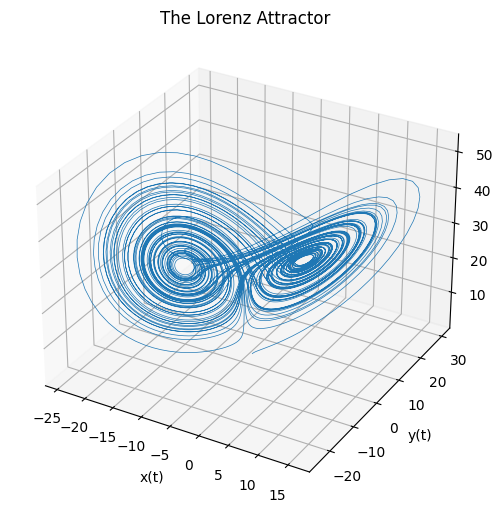

In [92]:
# solving the lorenz system:

def dx(x, y, sigma):
    return sigma*(y - x)

def dy(x, y, z, r):
    return r*x - y - x*z

def dz(x, y, z, b):
    return x*y - b*z

def RK4_Lorenz(x, y, z, dx, dy, dz, sigma, r, b, h):
    for i in range(0, len(x) - 1):
        k1x = h*dx(x[i], y[i], sigma)
        k2x = h*dx(x[i] + 0.5*k1x, y[i], sigma)
        k3x = h*dx(x[i] + 0.5*k2x, y[i], sigma)
        k4x = h*dx(x[i] + k3x, y[i], sigma)
        x[i+1] = x[i] + (k1x + 2*k2x + 2*k3x + k4x)/6

        k1y = h*dy(x[i], y[i], z[i], r)
        k2y = h*dy(x[i], y[i] + 0.5*k1y, z[i], r)
        k3y = h*dy(x[i], y[i] + 0.5*k2y, z[i], r)
        k4y = h*dy(x[i], y[i] + k3y, z[i], r)
        y[i+1] = y[i] + (k1y + 2*k2y + 2*k3y + k4y)/6

        k1z = h*dz(x[i], y[i], z[i], b)
        k2z = h*dz(x[i], y[i], z[i] + 0.5*k1z, b)
        k3z = h*dz(x[i], y[i], z[i] + 0.5*k2z, b)
        k4z = h*dz(x[i], y[i], z[i] + k3z, b)
        z[i+1] = z[i] + (k1z + 2*k2z + 2*k3z + k4z)/6

    return x, y, z

h = 0.01
t = np.arange(0, 100, h)
x = np.zeros(len(t))
y = np.zeros(len(t))
z = np.zeros(len(t))
x[0] = 1
y[0] = 1
z[0] = 1
sigma = 10
b = 2
r = 28
xs, ys, zs = RK4_Lorenz(x, y, z, dx, dy, dz, sigma, r, b, h) 
xs = xs + 0.5*np.random.randint(-10, 10)
ys = ys + 0.5*np.random.randint(-10, 10)
zs = zs + 0.5*np.random.randint(-10, 10)
fig = plt.figure(figsize=(5,9)) 
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs , ys, zs, lw=0.5)
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.set_title('The Lorenz Attractor')
plt.tight_layout()
plt.show()

[14, 18, 33, 38, 48, 58, 62, 65, 83, 88, 90, 92, 97]


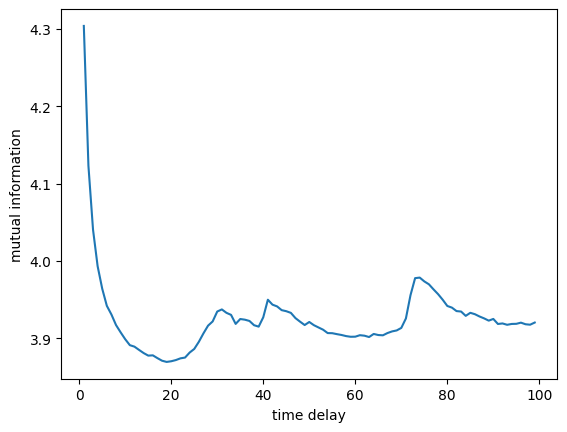

In [117]:
# methods for mutual information:
def entropy(p):
    p_norm = p / np.sum(p)
    p_norm = p_norm[np.nonzero(p_norm)]
    S = -np.sum(p_norm* np.log(p_norm))  
    return S

def MI(X,Y,bins):
    p_XY = np.histogram2d(X,Y,bins)[0]
    p_X = np.histogram(X,bins)[0]
    p_Y = np.histogram(Y,bins)[0]
 
    S_X = entropy(p_X)
    S_Y = entropy(p_Y)
    S_XY = entropy(p_XY)
 
    MI = S_X + S_Y - S_XY
    return MI

# finding MI:
MI_vals = []
for i in range(1,100):
    v1 = xs[0:len(xs) - i]
    v2 = xs[i : len(xs)]
    MI_vals.append(MI(v1, v2, 1000))
mins = []
for i in range(1, len(MI_vals)-1):
    if MI_vals[i] < MI_vals[i-1] and MI_vals[i] < MI_vals[i+1]:
        mins.append(i)

print(mins)
plt.plot(np.arange(1,len(MI_vals)+1), MI_vals)
plt.xlabel('time delay')
plt.ylabel('mutual information')
plt.show()


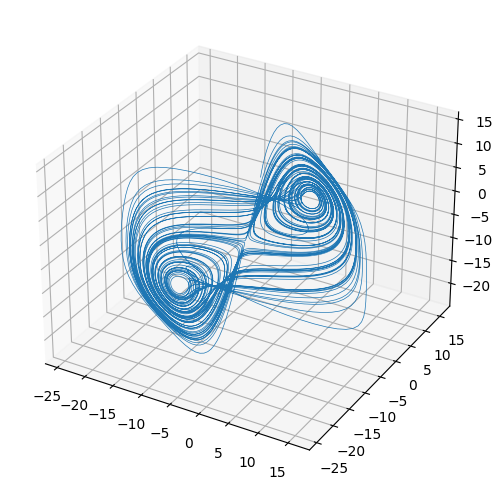

In [112]:
# try for 14 (the first minimum) assuming 3 dimensions:
v1 = xs[0: len(xs) - 28]
v2 = xs[14: len(xs) - 14]
v3 = xs[28: len(xs)]
fig = plt.figure(figsize=(5,9)) 
ax = fig.add_subplot(111, projection='3d')
ax.plot(v1, v2, v3, lw=0.5)
plt.tight_layout()
plt.show()

[100.0, 0.24965, 0.15040723981900453, 0.15343605546995376, 0.08958558558558559, 0.136027397260274, 0.17996370235934664, 0.1704302925989673, 0.2135637149028078]


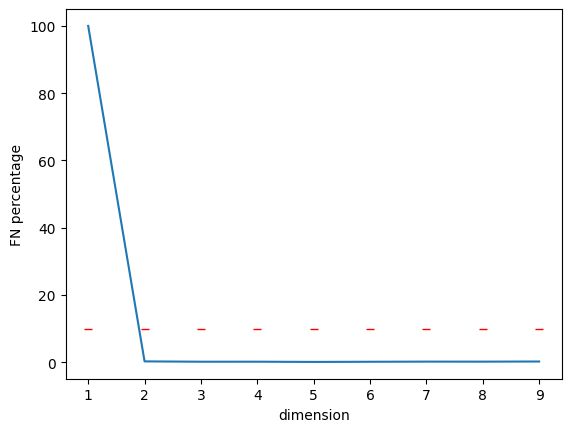

In [113]:
# False neighbors
tol = 10
tau = 14
d_ar = []
FN_perc = []
for o in range(1, 10):
    di = 1
    d = 1
    for i in range(len(xs) - (o - 1) * tau - 1):
        R1 = np.abs(xs[i] - xs[i + 1]) 
        R2 = np.sqrt(R1**2 + (xs[i + (o - 1) * tau] - xs[i + (o - 1) * tau + 1])**2)
        if R1 != 0 and R2/R1 > tol:
            di = di + 1
        d = d + 1
    d_ar.append(o)
    FN_perc.append((d/di)/100)
print(FN_perc)
plt.plot(d_ar, FN_perc)
plt.plot(d_ar, 10*np.ones(len(d_ar)),  "_", color = 'red')
plt.ylabel("FN percentage")
plt.xlabel("dimension")
plt.show()


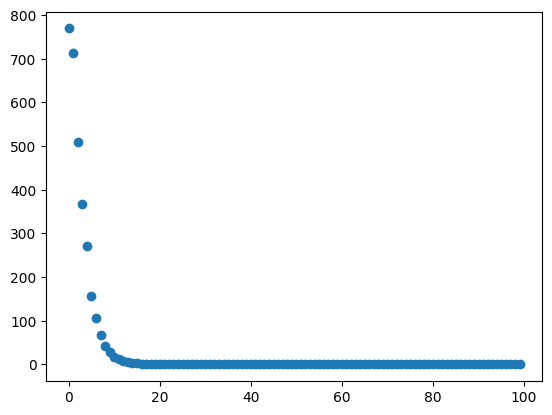

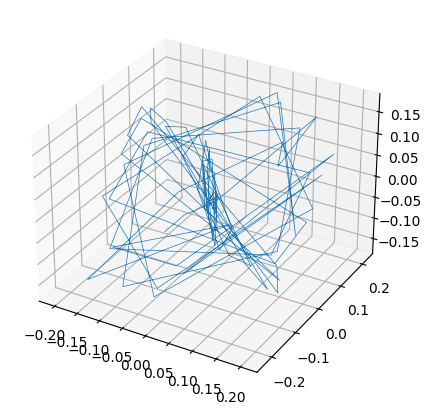

In [6]:
# SVD attempt

H = np.zeros((100,299))

for i in range(100):
    H[i] = xs[i+1: 300 + i]

U, S, V = np.linalg.svd(H, full_matrices=False)
plt.scatter(np.arange(len(S)), S)
plt.show()

fig = plt.figure(figsize=(5,9)) 
ax = fig.add_subplot(111, projection='3d')
ax.plot(V[:,1], V[:,2], V[:,3], lw=0.5)
plt.show()

In [7]:
# Interpolating the x values: 

n = len(t) - 1
t_matrix = np.zeros((3*n, 3*n))
x_matrix = np.zeros((3*n - 1, 1)) 


for i in range(0, 2*n - 1, 2):
    row1 = []
    row2 = []
    for j in range(i - int(i/2)):
        row1.append(0)
        row1.append(0)
        row1.append(0)
        row2.append(0)
        row2.append(0)
        row2.append(0)
    row1.append(t[i-int(i/2)]**2)
    row1.append(t[i - int(i/2)])
    row1.append(1)
    row2.append(t[i-int(i/2) + 1 ]**2)
    row2.append(t[i-int(i/2) + 1])
    row2.append(1)
    if len(row1) < 3*n:
        for o in range(3*n - len(row1)):
            row1.append(0)
            row2.append(0)
    t_matrix[i] = row1
    t_matrix[i+1] = row2


for i in range(1, n):
    row = []
    for j in range(1, i):
        row.append(0)
        row.append(0)
        row.append(0)
    row.append(2*t[i])
    row.append(1)
    row.append(0)
    row.append(- 2* t[i])
    row.append(-1)
    if len(row) < 3*n:
        for o in range(3*n - len(row)):
            row.append(0)
    t_matrix[2*n - 1 + i] = row
    
x_matrix[0] = xs[0]
x_matrix[2*n - 1] = xs[len(xs) -1]

for i in range(1, 2*n -1, 2):
    x_matrix[i] = xs[i + 1 - int((i+1)/2)]
    x_matrix[i+1] = xs[i + 1 - int((i+1)/2)]


t_matrix = np.delete(t_matrix, obj = 0, axis = 1)
t_matrix = np.delete(t_matrix, obj = 3*n - 1, axis = 0)

unknown_matrix = np.linalg.solve(t_matrix, x_matrix)


i = np.linspace(t[0], t[1])
j = unknown_matrix[0]*i + unknown_matrix[1]
plt.plot(i,j)


plt.scatter(t,xs, marker = '.')
plt.show()


for i in range(1, n):
       o = np.linspace(t[i], t[i+1])
       l = unknown_matrix[3*i - 1] * o**2 + unknown_matrix[3*i] * o + unknown_matrix[3*i + 1]
       x_023 = l = unknown_matrix[3*i - 1] * (o+0.23)**2 + unknown_matrix[3*i] * (o+0.23) + unknown_matrix[3*i + 1]
       plt.plot(o,l, color = 'r')
plt.show()


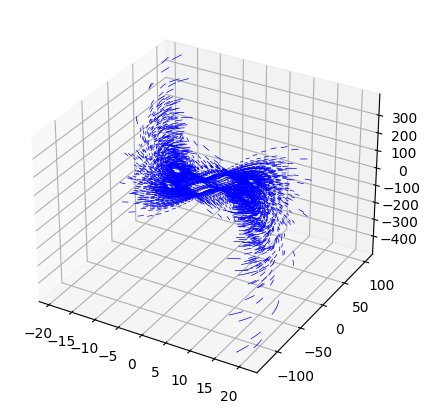

In [ ]:
# trying for random T:

# for i in range(1, n):
#        o = np.linspace(t[i], t[i+1])
#        l = unknown_matrix[3*i - 1] * o**2 + unknown_matrix[3*i] * o + unknown_matrix[3*i + 1]
#        plt.plot(l, l, color = 'r')
# plt.show()

# for i in range(1, n):
#        o = np.linspace(t[i], t[i+1])
#        l = unknown_matrix[3*i - 1] * o**2 + unknown_matrix[3*i] * o + unknown_matrix[3*i + 1]
#        x_018 = unknown_matrix[3*i - 1] * (o-0.18)**2 + unknown_matrix[3*i] * (o-0.18) + unknown_matrix[3*i + 1]
#        plt.plot(l, x_018, color = 'r')
# plt.show()

fig = plt.figure(figsize=(5,9)) 
ax = fig.add_subplot(111, projection='3d')
for i in range(1, n):
       o = np.linspace(t[i], t[i+1])
       l = unknown_matrix[3*i - 1] * o**2 + unknown_matrix[3*i] * o + unknown_matrix[3*i + 1]
       x_023 = unknown_matrix[3*i - 1] * (o+0.23)**2 + unknown_matrix[3*i] * (o+0.23) + unknown_matrix[3*i + 1]
       x_023_2 = unknown_matrix[3*i - 1] * (o+2*0.23)**2 + unknown_matrix[3*i] * (o+2*0.23) + unknown_matrix[3*i + 1]
       ax.plot(l, x_023, x_023_2, lw=0.5, color = 'b')
plt.show()

# for i in range(1, n):
#        o = np.linspace(t[i], t[i+1])
#        l = unknown_matrix[3*i - 1] * o**2 + unknown_matrix[3*i] * o + unknown_matrix[3*i + 1]
#        x_039 = unknown_matrix[3*i - 1] * (o+0.39)**2 + unknown_matrix[3*i] * (o+0.39) + unknown_matrix[3*i + 1]
#        plt.plot(l, x_039, color = 'r')
# plt.show()

# for i in range(1, n):
#        o = np.linspace(t[i], t[i+1])
#        l = unknown_matrix[3*i - 1] * o**2 + unknown_matrix[3*i] * o + unknown_matrix[3*i + 1]
#        x_07 = unknown_matrix[3*i - 1] * (o+0.7)**2 + unknown_matrix[3*i] * (o+0.7) + unknown_matrix[3*i + 1]
#        plt.plot(l, x_07, color = 'r')
# plt.show()

# for i in range(1, n):
#        o = np.linspace(t[i], t[i+1])
#        l = unknown_matrix[3*i - 1] * o**2 + unknown_matrix[3*i] * o + unknown_matrix[3*i + 1]
#        x_4 = unknown_matrix[3*i - 1] * (o+4)**2 + unknown_matrix[3*i] * (o+4) + unknown_matrix[3*i + 1]
#        plt.plot(l, x_4, color = 'r')
# plt.show()

